In [58]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

# Path to your text file
file_path = 'C:\physics_masters\data\wig20_components'

with open(file_path, 'r', encoding='utf-8') as f:
    content = f.read()

sections = content.strip().split('\n\n')[1:]
dates = [s[:10] for s in sections]
dates.append('2030-01-01')

data = [s.split('\n')[1:] for s in sections]
data = [[[l.split(' ')[2], float(l.split(' ')[-1].replace(',', '.'))] for l in d] for d in data]

df_by_date = {date: pd.DataFrame(d, columns=['Name', 'Share%']) for date, d in zip(dates, data)}


<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
C:\Users\mlata\AppData\Local\Temp\ipykernel_33532\3972110050.py:9: SyntaxWarning: invalid escape sequence '\p'
  file_path = 'C:\physics_masters\data\wig20_components'


In [129]:
pd_dates = pd.to_datetime(dates, format='%Y-%m-%d')

daily_omega = r"C:\\physics_masters\\data\\Bossa public market data\\pub\\daily\\omega\\"

wig20_dataframes = {}

for i, date in enumerate(dates[:-1]):
    names = df_by_date[date]['Name'].tolist() #[df_by_date[date]['Share%']>=8]
    filenames = [f"{daily_omega}{name}.prn" for name in names]
    df_date = pd.DataFrame()
    for name, filename in zip(names, filenames): 
        if os.path.exists(filename):
            df = pd.read_csv(filename, delimiter=',', header=0, parse_dates=['Date'], usecols=['Date', 'Close'])
            df = df[(df['Date'] >= pd_dates[i]) & (df['Date'] < pd_dates[i+1])].set_index('Date')
            df.rename(columns={"Close": name}, inplace=True)
            df_date = pd.concat([df_date, df], axis=1)
        else:
            df_by_date[date].drop(df_by_date[date][df_by_date[date]['Name'] == name].index, inplace=True)

    df_date = df_date.dropna()
    wig20_dataframes[date] = df_date


<Axes: xlabel='Date'>

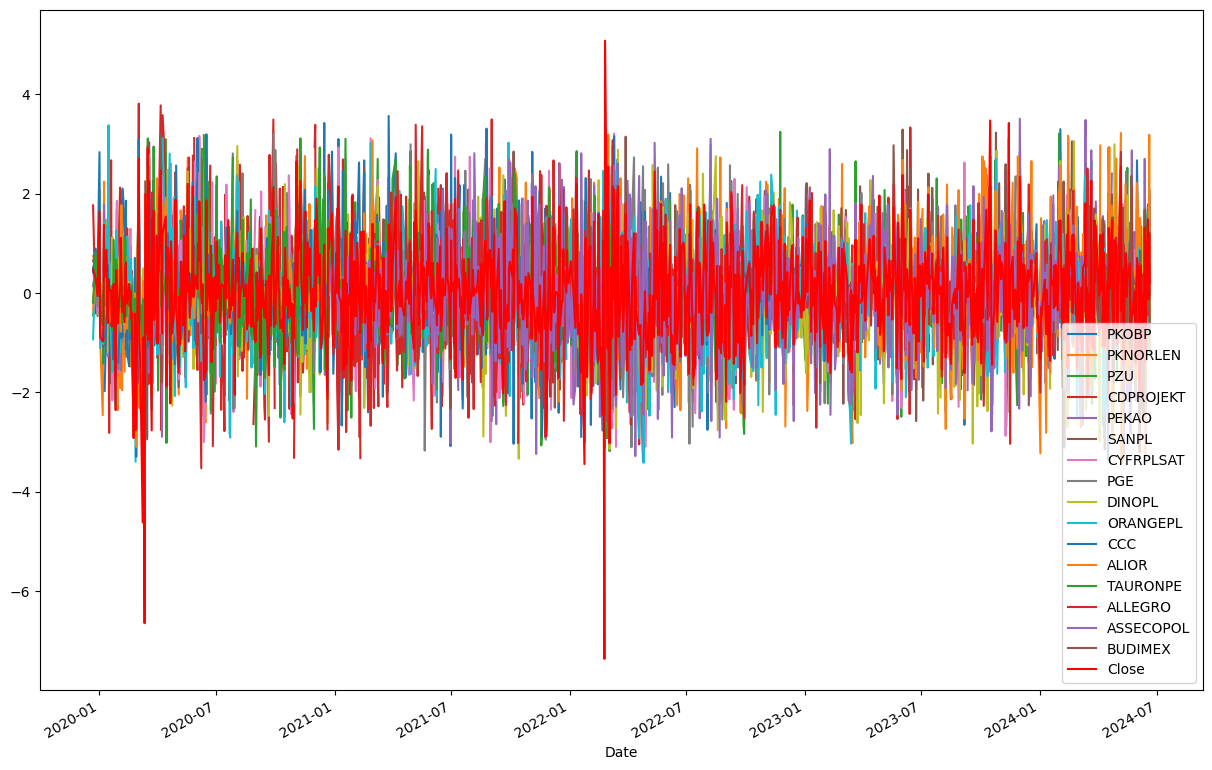

In [209]:
fig, ax = plt.subplots(figsize=(15, 10))

df_concat = pd.concat(wig20_dataframes.values()).diff()
sigma = df_concat.std()
df_concat = df_concat[(df_concat < 3*sigma) & (df_concat > -3*sigma)]
df_concat = (df_concat - df_concat.mean()) / df_concat.std()


df_concat.plot(ax=ax)
wig20 = pd.read_csv(f'{daily_omega}WIG20.prn', delimiter=',', header=0, parse_dates=['Date'], usecols=['Date', 'Close']).set_index('Date')
wig20 = wig20[(wig20.index >= pd_dates[0])].diff()
wig20 = (wig20 - wig20.mean()) / wig20.std()
wig20.plot(ax=ax, color='red', label='WIG20')